
## Importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Loading the data

In [3]:
df = pd.read_csv('../data/benin-malanville.csv', parse_dates=True, index_col=0)
df.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


## Summary Statistics & Missing-Value Report

In [4]:
# Summary statistics for numeric columns
summary_stats = df.describe()
summary_stats


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [5]:
# Count missing (NaN) values
missing_values = df.isna().sum().sort_values(ascending=False)
missing_values


Comments         525600
GHI                   0
DNI                   0
DHI                   0
ModB                  0
ModA                  0
RH                    0
WS                    0
WSgust                0
Tamb                  0
WSstdev               0
WD                    0
BP                    0
WDstdev               0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64

In [6]:
# Calculate percentage of missing values
missing_percent = (df.isna().sum() / len(df)) * 100
missing_report = pd.DataFrame({
    'missing_count': df.isna().sum(),
    'missing_percent': missing_percent
}).sort_values(by='missing_percent', ascending=False)

missing_report


,missing_count,missing_percent
Comments,525600,100.0
GHI,0,0.0
DNI,0,0.0
DHI,0,0.0
ModB,0,0.0
ModA,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0
Tamb,0,0.0


In [7]:
# Columns with more than 5% missing data
high_missing = missing_report[missing_report['missing_percent'] > 5]
high_missing

,missing_count,missing_percent
Comments,525600,100.0


## Cleaning & Outlier Handling Steps

In [8]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df[key_cols].isna().sum()


GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

In [9]:
# Compute Z-scores and convert to a DataFrame (important!)
z_scores = np.abs(stats.zscore(df[key_cols], nan_policy='omit'))

# Wrap the z-scores in a DataFrame with same index and columns as df
z_df = pd.DataFrame(z_scores, columns=key_cols, index=df.index)

# Create a boolean mask for outliers
outliers = z_df > 3


In [10]:
# Replace outliers with the median of each column
for col in key_cols:
    median_val = df[col].median()
    df.loc[outliers[col], col] = median_val

In [11]:
print("Outliers replaced per column:")
print(outliers.sum())


Outliers replaced per column:
GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


In [12]:
df.to_csv('../data/benin_clean.csv', index=False)

## Time Series Analysis


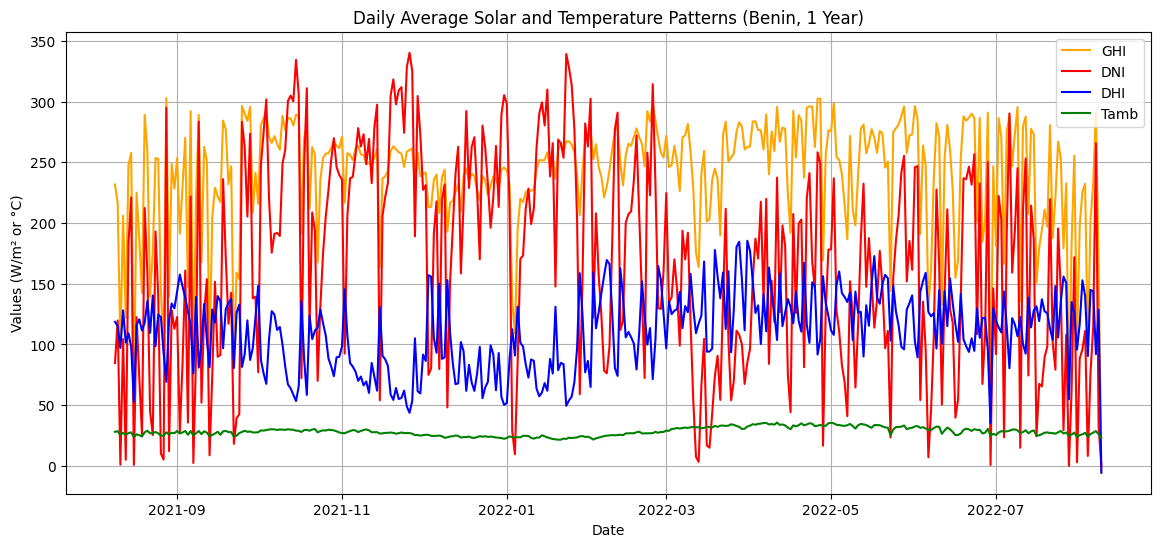

In [13]:
# Resample daily mean values
df_daily = df.resample('D').mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df_daily.index, df_daily['GHI'], label='GHI', color='orange')
plt.plot(df_daily.index, df_daily['DNI'], label='DNI', color='red')
plt.plot(df_daily.index, df_daily['DHI'], label='DHI', color='blue')
plt.plot(df_daily.index, df_daily['Tamb'], label='Tamb', color='green')

plt.title('Daily Average Solar and Temperature Patterns (Benin, 1 Year)')
plt.xlabel('Date')
plt.ylabel('Values (W/m² or °C)')
plt.legend()
plt.grid(True)
plt.show()


In short:

Solar Radiation (GHI, DNI, DHI): All three solar metrics (Global, Direct, and Diffuse) are high and fluctuate daily. GHI (yellow) is highest, followed by DNI (red), then DHI (blue). They show seasonal dips around December/January.
Temperature (Tamb - green): Ambient temperature is low and stable (~25-30°C) with very little variation throughout the year.
Key takeaway: Benin gets strong, consistent solar energy year-round, with a slight dip in winter, while temperatures remain warm and steady.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17340\1616337682.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


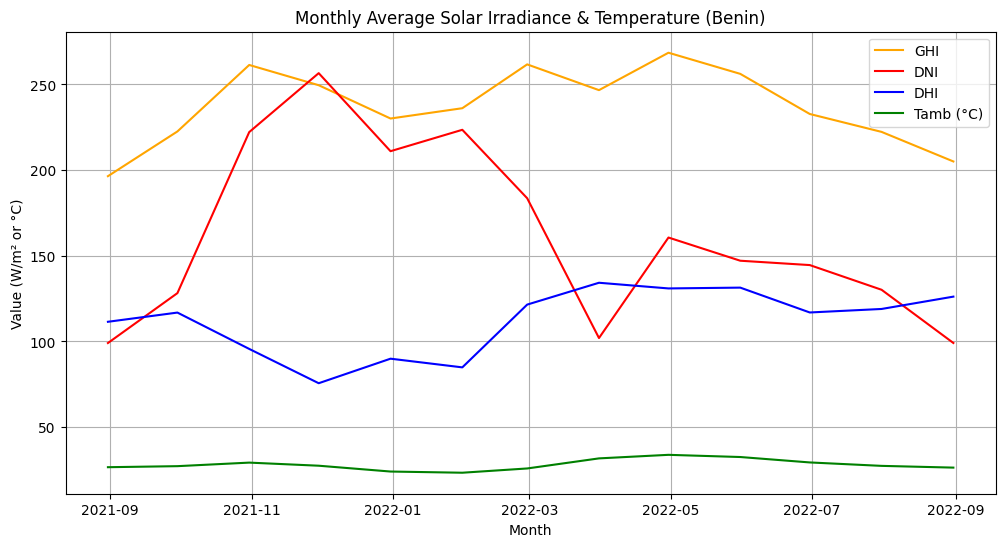

In [14]:
import matplotlib.pyplot as plt

# Compute monthly averages
df_monthly = df.resample('M').mean()

plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, df_monthly['GHI'], label='GHI', color='orange')
plt.plot(df_monthly.index, df_monthly['DNI'], label='DNI', color='red')
plt.plot(df_monthly.index, df_monthly['DHI'], label='DHI', color='blue')
plt.plot(df_monthly.index, df_monthly['Tamb'], label='Tamb (°C)', color='green')

plt.title('Monthly Average Solar Irradiance & Temperature (Benin)')
plt.xlabel('Month')
plt.ylabel('Value (W/m² or °C)')
plt.legend()
plt.grid(True)
plt.show()


Solar Irradiance (GHI, DNI, DHI):
GHI (yellow) – Total sunlight – peaks around May/June (~270 W/m²) and dips in December (~200 W/m²).
DNI (red) – Direct sunlight – peaks sharply in November (~255 W/m²), drops low in December (~100 W/m²), then rises again.
DHI (blue) – Diffuse sunlight – generally lower, with a dip in December and a rise in spring/summer.
Temperature (Tamb - green): Ambient temperature stays very stable year-round, hovering between ~25–35°C, with only a small peak in May.
Key takeaway: Solar energy is strongest in the dry season (Nov–Jun), especially for direct sun (DNI). Temperature remains consistently warm all year.

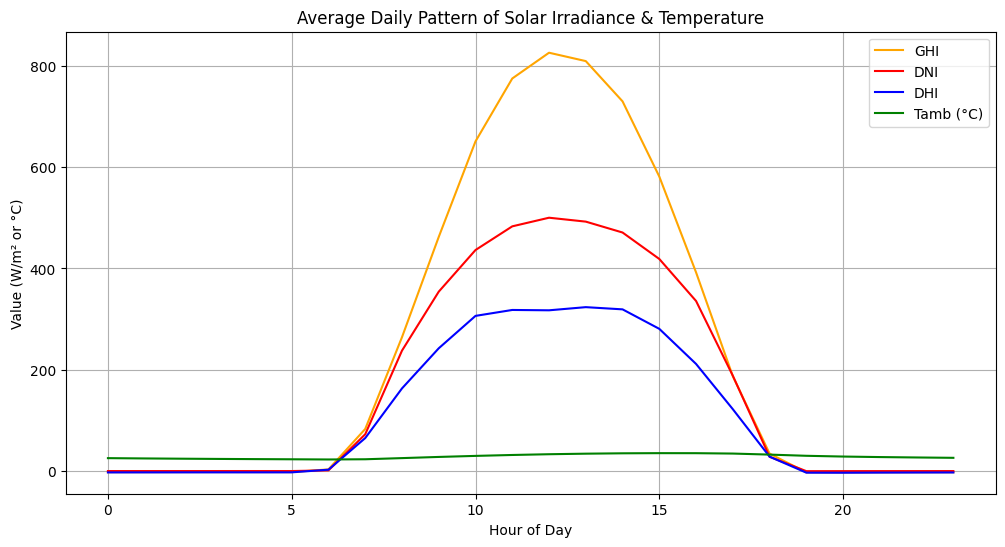

In [15]:
# Extract hour of day
df['hour'] = df.index.hour

# Group by hour and compute mean
df_hourly = df.groupby('hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

plt.figure(figsize=(12,6))
plt.plot(df_hourly.index, df_hourly['GHI'], label='GHI', color='orange')
plt.plot(df_hourly.index, df_hourly['DNI'], label='DNI', color='red')
plt.plot(df_hourly.index, df_hourly['DHI'], label='DHI', color='blue')
plt.plot(df_hourly.index, df_hourly['Tamb'], label='Tamb (°C)', color='green')

plt.title('Average Daily Pattern of Solar Irradiance & Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Value (W/m² or °C)')
plt.legend()
plt.grid(True)
plt.show()


Solar Irradiance (GHI, DNI, DHI):
All three rise at sunrise (~6 AM), peak around midday (12–1 PM), and fall to zero at sunset (~6 PM).
GHI (yellow) – Total sunlight – peaks highest (~820 W/m²).
DNI (red) – Direct sunlight – peaks next (~500 W/m²).
DHI (blue) – Diffuse sunlight – peaks lowest (~320 W/m²).
Temperature (Tamb - green): Ambient temperature rises slowly after sunrise, peaks in the late afternoon (~3–4 PM) at ~40°C, and cools overnight.

## Cleaning Impact

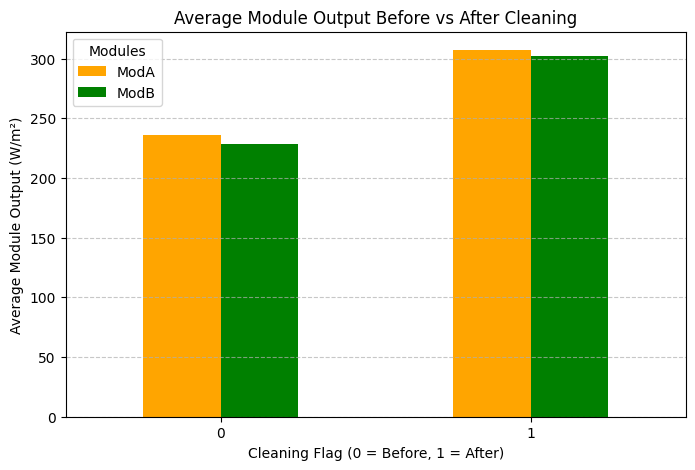

In [16]:
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()


cleaning_impact.plot(
    kind='bar',
    figsize=(8,5),
    color=['orange', 'green']
)

plt.title('Average Module Output Before vs After Cleaning')
plt.xlabel('Cleaning Flag (0 = Before, 1 = After)')
plt.ylabel('Average Module Output (W/m²)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Modules')
plt.show()



In short:

Before Cleaning (Flag = 0): Both modules (ModA and ModB) had lower output (~235–240 W/m²).
After Cleaning (Flag = 1): Output jumped significantly for both modules to ~305–310 W/m².
ModA (orange) consistently outperforms ModB (green), both before and after cleaning.
Key takeaway: Cleaning solar panels increases their energy production by about 25–30%.

## Correlation & Relationship Analysis

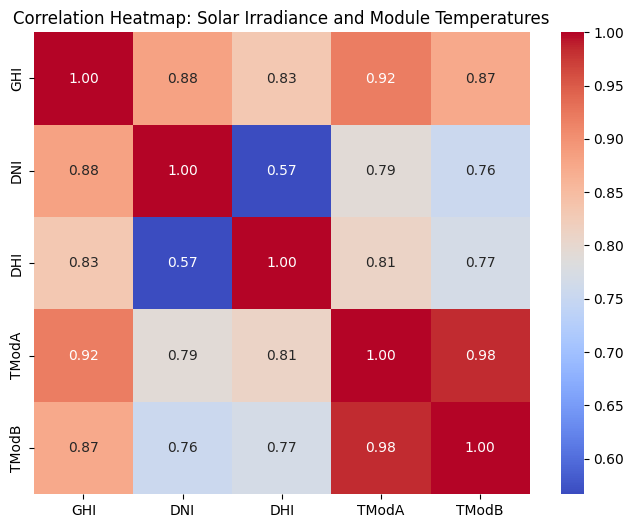

In [17]:
# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Compute correlation matrix
corr = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Solar Irradiance and Module Temperatures")
plt.show()

In short:

Strongest Links (Red/Orange - 0.9+):
Module temperatures (TModA & TModB) are very highly correlated with each other (0.98) and with GHI (0.92 & 0.87).
GHI is also strongly linked to DNI (0.88) and DHI (0.83).
Moderate Links (Blue - 0.5–0.7):
DNI and DHI have a weaker link (0.57), meaning direct and diffuse sunlight don’t always change together.
Key takeaway: Module temperatures rise with total sunlight (GHI), and the two modules behave almost identically. Direct (DNI) and diffuse (DHI) sunlight are less closely tied to each other

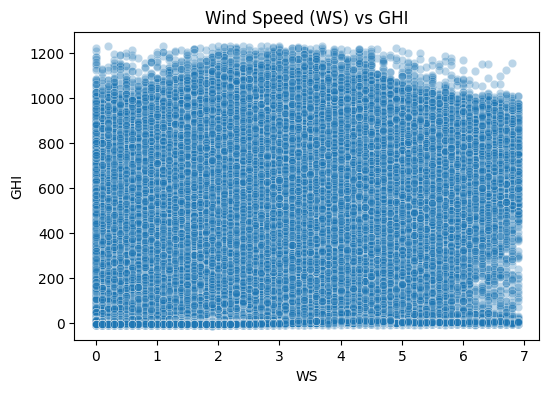

In [18]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='WS', y='GHI', alpha=0.3)
plt.title('Wind Speed (WS) vs GHI')
plt.show()


In short:

There is no clear pattern or correlation.
High GHI (sunny) can happen with any wind speed (from calm to 7 m/s).
Low GHI (cloudy/dark) also occurs across all wind speeds.
Key takeaway: Wind speed doesn’t reliably predict how sunny or cloudy it will be. Solar energy production isn’t directly affected by wind in this dataset.

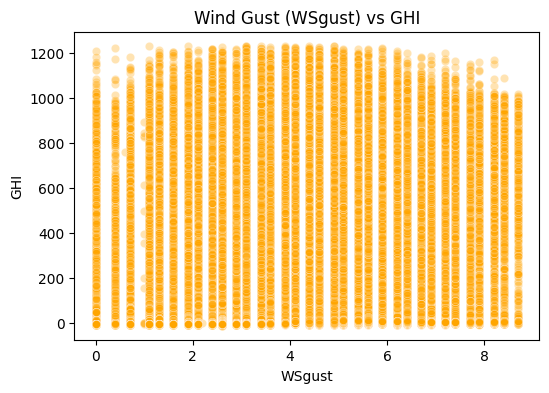

In [19]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='WSgust', y='GHI', alpha=0.3, color='orange')
plt.title('Wind Gust (WSgust) vs GHI')
plt.show()


This chart shows the relationship between Wind Gust (WSgust) and Global Horizontal Irradiance (GHI) — how strong wind bursts relate to sunlight levels.

In short:

There is no clear correlation.
High GHI (sunny) happens with both low and high wind gusts (up to 8 m/s).
Low GHI (cloudy/dark) also occurs across all gust levels.
Key takeaway: Wind gusts do not predict solar irradiance. Solar energy output is not meaningfully affected by short-term wind bursts in this data.

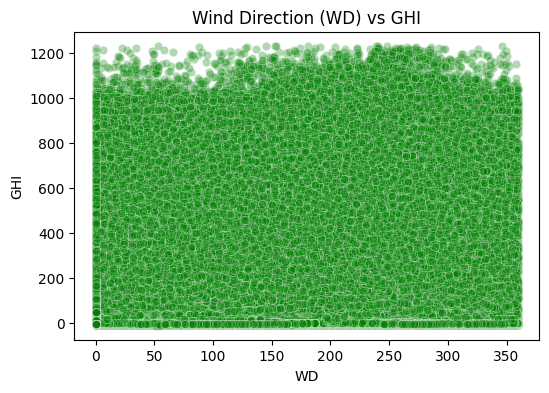

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='WD', y='GHI', alpha=0.3, color='green')
plt.title('Wind Direction (WD) vs GHI')
plt.show()


This chart shows the relationship between Wind Direction (WD) — measured in degrees (0° = North, 90° = East, etc.) — and Global Horizontal Irradiance (GHI), or how sunny it is.

In short:

There is no clear pattern or correlation.
High GHI (sunny) occurs at every wind direction.
Low GHI (cloudy/dark) also happens regardless of which way the wind is blowing.
Key takeaway: The direction the wind is coming from does not affect how much sunlight reaches the ground. Solar irradiance is independent of wind direction in this dataset.

## Wind & Distribution Analysis


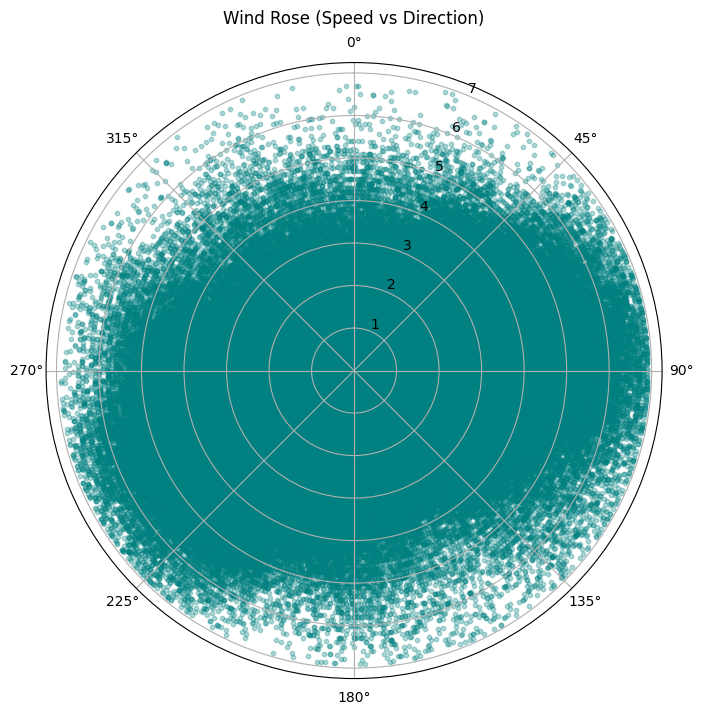

In [21]:
# Drop missing values
wind_df = df[['WD', 'WS']].dropna()

# Convert to radians for polar plotting
wind_dir_rad = np.deg2rad(wind_df['WD'])

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location('N')   # 0° at North
ax.set_theta_direction(-1)        # Clockwise

# Plot wind speed vs direction
ax.scatter(wind_dir_rad, wind_df['WS'], alpha=0.3, s=10, color='teal')

ax.set_title("Wind Rose (Speed vs Direction)", va='bottom')
plt.show()

This is a Wind Rose chart, which shows how wind speed and direction are distributed over time.

In short:

Wind Direction: The wind blows from all directions fairly evenly, with no single dominant direction. There’s a slight tendency for winds to come from the north-northeast (0°–45°) and south-southwest (225°–270°).
Wind Speed: Most of the time, the wind is light to moderate, mostly between 1 and 5 m/s (as shown by the concentration of dots within those rings). Stronger winds (6–7 m/s) are less frequent and occur in all directions.
Key takeaway: The location experiences variable wind directions with no strong prevailing wind, and most winds are gentle to moderate in speed.

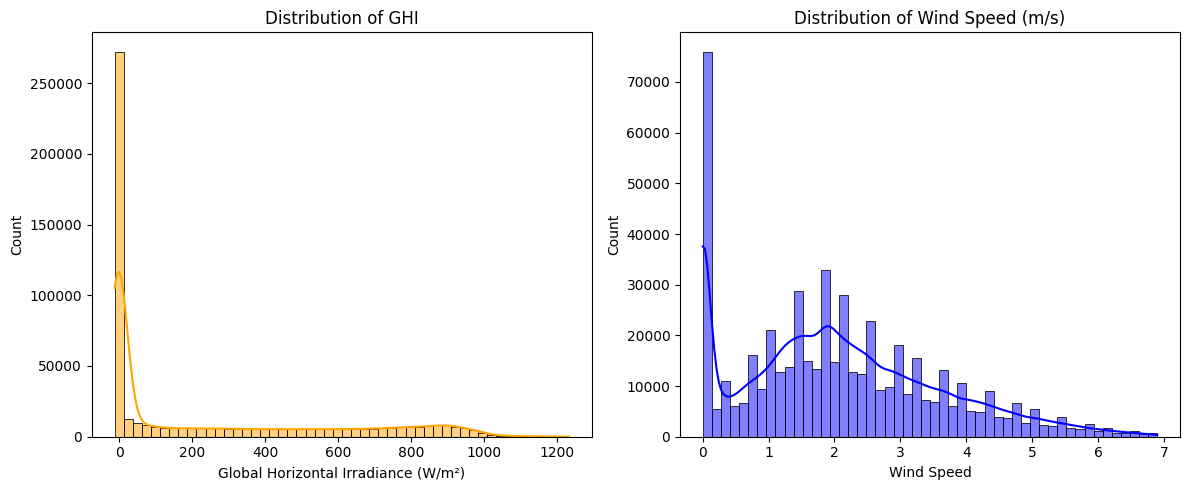

In [22]:
#
plt.figure(figsize=(12,5))

# Histogram for GHI
plt.subplot(1,2,1)
sns.histplot(df['GHI'], bins=50, kde=True, color='orange')
plt.title('Distribution of GHI')
plt.xlabel('Global Horizontal Irradiance (W/m²)')

# Histogram for WS
plt.subplot(1,2,2)
sns.histplot(df['WS'], bins=50, kde=True, color='blue')
plt.title('Distribution of Wind Speed (m/s)')
plt.xlabel('Wind Speed')

plt.tight_layout()
plt.show()

In short:

Sunlight (GHI - left):
Most of the time, there’s no sun (GHI = 0 W/m²) — this is nighttime or very cloudy conditions.
When the sun is out, GHI peaks around 500–700 W/m², with very few readings above 1000 W/m².
Wind Speed (right):
Calm conditions (0 m/s) are most frequent.
Wind speed drops off quickly as it increases — moderate winds (1–3 m/s) are common, but strong winds (>4 m/s) are rare.
Key takeaway: The site has long periods of darkness or low sun, and mostly calm to light winds. Strong sunshine and high winds are uncommon.

## Correlation between RH, Tamb, and GHI

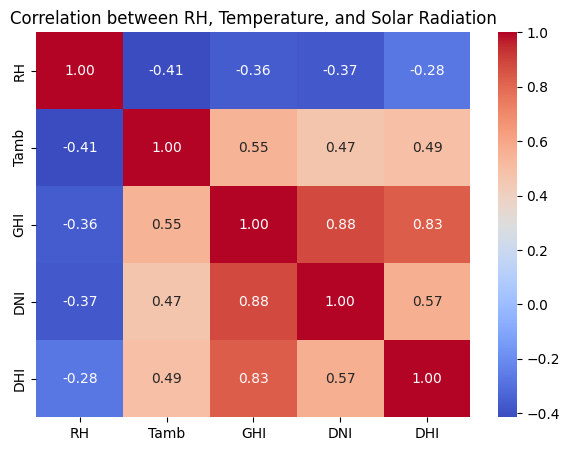

In [23]:
# Select key columns
temp_corr = df[['RH', 'Tamb', 'GHI', 'DNI', 'DHI']].corr()

# Plot correlation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(temp_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between RH, Temperature, and Solar Radiation')
plt.show()

This heatmap shows how Relative Humidity (RH), Ambient Temperature (Tamb), and the three solar radiation types (GHI, DNI, DHI) are related to each other.

In short:

✅ Solar Radiation is strongly linked to temperature:
GHI, DNI, and DHI all have strong positive correlations with Tamb (0.55, 0.47, 0.49). Warmer days = more sun.
❌ Humidity is negatively linked to sun & heat:
RH has a moderate negative correlation with GHI, DNI, and DHI (-0.36, -0.37, -0.28). Higher humidity = less sunlight.
RH also has a moderate negative link with temperature (-0.41). Humid days tend to be slightly cooler.
✅ Solar components are strongly linked to each other:
GHI-DNI: 0.88, GHI-DHI: 0.83, DNI-DHI: 0.57 — meaning they generally rise and fall together.
Key takeaway: Sunny, hot days tend to be drier. Cloudy or humid days mean less solar energy and slightly lower temperatures. The different types of solar radiation move together closely.

### Scatter Plots — Relationship Patterns

Let’s visualize those relationships more directly.

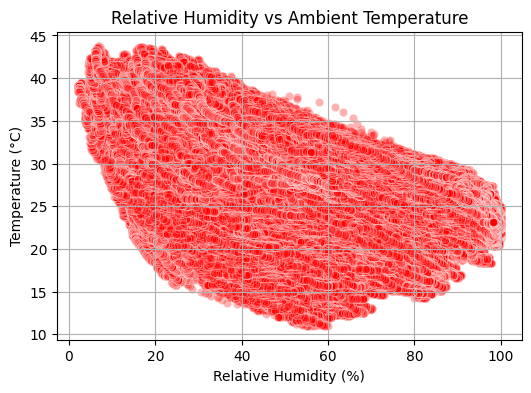

In [24]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.3, color='red')
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


This chart shows the relationship between Relative Humidity (%) and Ambient Temperature (°C).

In short:

There is a clear negative correlation: as temperature increases, humidity tends to decrease, and vice versa.
The data forms a distinct diagonal band — when it’s hot (35–45°C), humidity is low (10–40%). When it’s cooler (15–25°C), humidity is higher (60–90%).
Key takeaway: Hot days are typically drier, while cooler days are more humid. This inverse relationship is common in many climates.

### RH vs Solar Irradiance (GHI)

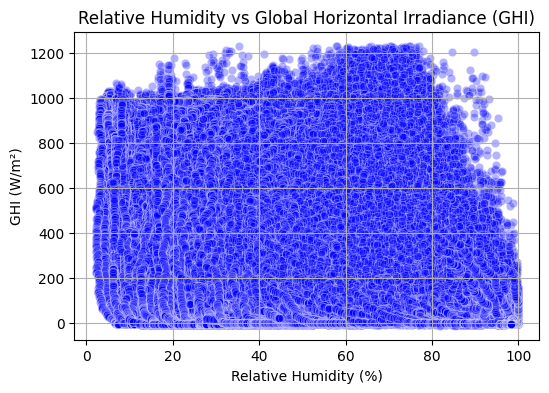

In [25]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.3, color='blue')
plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()


This chart shows the relationship between Relative Humidity (%) and Global Horizontal Irradiance (GHI) — how sunny it is.

In short:

There is a weak negative correlation: as humidity increases, sunlight tends to decrease slightly.
High GHI (sunny) occurs mostly at lower humidity levels (below 60%).
Low GHI (cloudy/dark) can happen at any humidity level, but is more common at higher humidity.
Key takeaway: While very high humidity often means less sun, you can still get strong sunlight even with moderate humidity. The relationship isn’t strict — other factors like cloud cover matter more for solar irradiance than humidity alone.

## Basic Bubble Chart — RH as Bubble Size

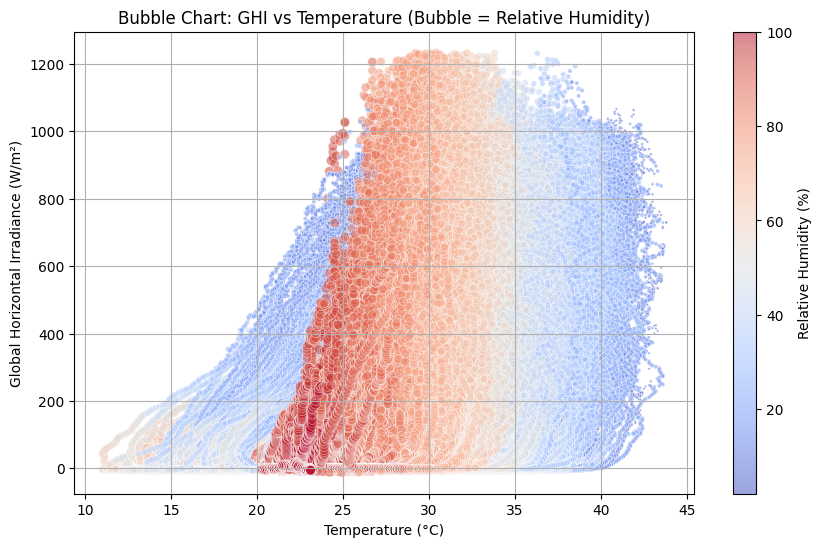

In [26]:
plt.figure(figsize=(10,6))

# Scale bubble sizes for better visibility (divide by constant)
plt.scatter(
    df['Tamb'], 
    df['GHI'], 
    s=df['RH'] / 2,     # bubble size (scaled)
    c=df['RH'],         # color by humidity
    cmap='coolwarm', 
    alpha=0.5, 
    edgecolors='w', 
    linewidth=0.5
)

plt.title("Bubble Chart: GHI vs Temperature (Bubble = Relative Humidity)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
plt.colorbar(label='Relative Humidity (%)')
plt.grid(True)
plt.show()

This bubble chart shows the relationship between Global Horizontal Irradiance (GHI), Temperature (°C), and Relative Humidity (%) — where the color of each bubble represents humidity.

In short:

✅ Sun + Heat = Dry: High GHI (sunny) and high temperature (30–40°C) occur together, and are associated with low humidity (blue bubbles).
❌ Cool + Cloudy = Humid: Low GHI (cloudy/dark) and lower temperatures (15–25°C) are linked to high humidity (red/orange bubbles).
🔄 Trade-off: There’s a clear trade-off — when it’s hot and sunny, it’s dry; when it’s cooler and less sunny, it’s more humid.
Key takeaway: The sunniest, hottest days are also the driest. Cooler, cloudier days tend to be more humid. This reflects a typical tropical or subtropical climate pattern.